In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.BCEWithLogitsLoss()

### For k = 1

In [7]:
k=1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy_manual, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 16107.1089 - average: 0.2685; Performance: 0.8839
TESTING - loss 1790.0375798344612 - performance 0.9356
Epoch 2 completed. Loss - total: 8613.7582 - average: 0.1436; Performance: 0.9488
TESTING - loss 1209.2479690909386 - performance 0.9573
Epoch 3 completed. Loss - total: 6445.0953 - average: 0.1074; Performance: 0.9621
TESTING - loss 969.6837551891804 - performance 0.9655
Epoch 4 completed. Loss - total: 5381.7731 - average: 0.0897; Performance: 0.9687
TESTING - loss 833.774097263813 - performance 0.9695
Epoch 5 completed. Loss - total: 4702.5447 - average: 0.0784; Performance: 0.9730
TESTING - loss 745.8780147135258 - performance 0.9731
Epoch 6 completed. Loss - total: 4215.3287 - average: 0.0703; Performance: 0.9762
TESTING - loss 683.6176738142967 - performance 0.9761
Epoch 7 completed. Loss - total: 3838.9391 - average: 0.0640; Performance: 0.9779
TESTING - loss 637.0665729045868 - performance 0.9790
Epoch 8 completed. Loss - t

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

In [9]:
k=1
model2 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model2, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy_manual, device="cuda:0",lr = learn_rate, lr_scheduler=None, updateWManually=False)


Training on cuda:0
Epoch 1 completed. Loss - total: 12091.9090 - average: 0.2015; Performance: 0.9186
TESTING - loss 1182.2218298912048 - performance 0.9579
Epoch 2 completed. Loss - total: 5736.7558 - average: 0.0956; Performance: 0.9668
TESTING - loss 816.7421966791153 - performance 0.9717
Epoch 3 completed. Loss - total: 4374.1128 - average: 0.0729; Performance: 0.9746
TESTING - loss 672.7232690900564 - performance 0.9766
Epoch 4 completed. Loss - total: 3639.6685 - average: 0.0607; Performance: 0.9786
TESTING - loss 591.529855504632 - performance 0.9797
Epoch 5 completed. Loss - total: 3144.1803 - average: 0.0524; Performance: 0.9817
TESTING - loss 537.8415323793888 - performance 0.9817
Epoch 6 completed. Loss - total: 2768.4941 - average: 0.0461; Performance: 0.9839
TESTING - loss 499.1573616862297 - performance 0.9828
Epoch 7 completed. Loss - total: 2466.4204 - average: 0.0411; Performance: 0.9860
TESTING - loss 471.4836310595274 - performance 0.9837
Epoch 8 completed. Loss - to

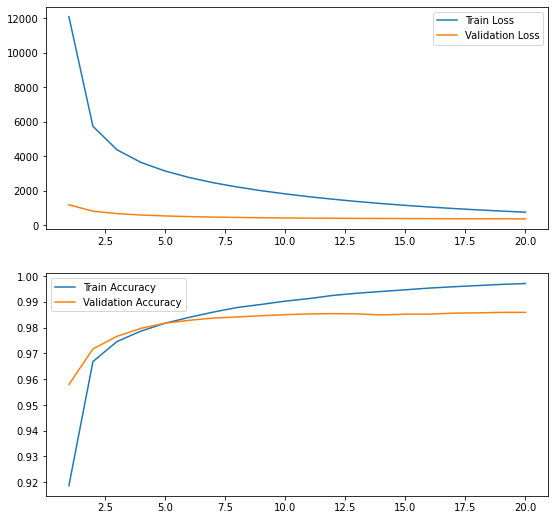

In [10]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [13]:
k = 3

model3 = MLP(k,"ReLU")
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList3, trainAccList3, valLossList3, valAccList3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy_manual, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41796.2709 - average: 0.6966; Performance: 0.5006
TESTING - loss 6967.79078245163 - performance 0.4973
Epoch 2 completed. Loss - total: 41607.1265 - average: 0.6935; Performance: 0.4985
TESTING - loss 6914.887309074402 - performance 0.5006
Epoch 3 completed. Loss - total: 41182.9515 - average: 0.6864; Performance: 0.5020
TESTING - loss 6785.058319568634 - performance 0.5114
Epoch 4 completed. Loss - total: 40065.6256 - average: 0.6678; Performance: 0.5166
TESTING - loss 6529.39647436142 - performance 0.5531
Epoch 5 completed. Loss - total: 38364.0786 - average: 0.6394; Performance: 0.5656
TESTING - loss 6192.772209644318 - performance 0.5967
Epoch 6 completed. Loss - total: 36815.1913 - average: 0.6136; Performance: 0.6120
TESTING - loss 5994.7710037231445 - performance 0.6469
Epoch 7 completed. Loss - total: 35588.3937 - average: 0.5931; Performance: 0.6372
TESTING - loss 5817.1427845954895 - performance 0.6475
Epoch 8 completed. Los

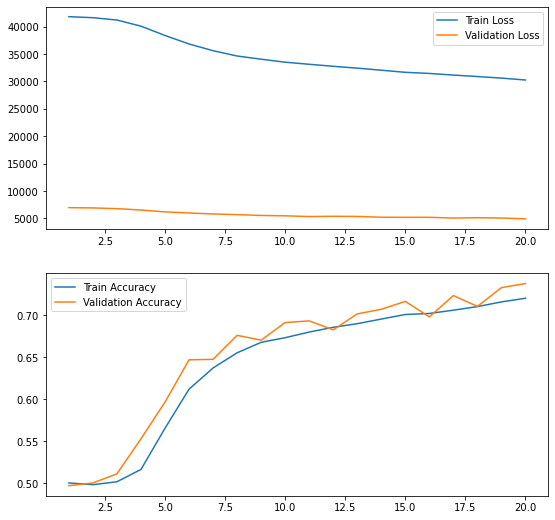

In [15]:
plot_loss_accuracy(trainLostList3,valLossList3,trainAccList3,valAccList3,num_epochs)

In [17]:
k = 3
model4 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList4, trainAccList4, valLossList4, valAccList4  = train_model(model4, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy_manual, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41761.9126 - average: 0.6960; Performance: 0.5005
TESTING - loss 6931.865632534027 - performance 0.4956
Epoch 2 completed. Loss - total: 41491.1439 - average: 0.6915; Performance: 0.5008
TESTING - loss 6873.06535243988 - performance 0.4994
Epoch 3 completed. Loss - total: 40341.6893 - average: 0.6724; Performance: 0.5132
TESTING - loss 6488.51478099823 - performance 0.5316
Epoch 4 completed. Loss - total: 37316.7276 - average: 0.6219; Performance: 0.5948
TESTING - loss 5884.303390979767 - performance 0.6376
Epoch 5 completed. Loss - total: 35162.7239 - average: 0.5860; Performance: 0.6464
TESTING - loss 5697.1142292022705 - performance 0.6472
Epoch 6 completed. Loss - total: 34162.5856 - average: 0.5694; Performance: 0.6634
TESTING - loss 5527.315676212311 - performance 0.6856
Epoch 7 completed. Loss - total: 33522.8466 - average: 0.5587; Performance: 0.6742
TESTING - loss 5474.464654922485 - performance 0.6830
Epoch 8 completed. Loss

In [ ]:
plot_loss_accuracy(trainLostList4,valLossList4,trainAccList4,valAccList4,num_epochs)

In [ ]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20

fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD"]:
    model = MLP(K, activation)

    if "features" in activation:
        # deactivate the first layer
        optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
    elif "NTK" in activation:
        paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
        optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
    elif "SGD" in activation:
        optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
    else:
        optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

    print("Activation:",activation)

    trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_fn, optimizer, num_epochs, 
                                                                        batch_size, validate_model = True, performance=accuracy, 
                                                                        device="cuda:0", lr_scheduler=None)

    plotValAccuracy(valAccList,num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper
